In [32]:
# MNIST 예제를 구현해 보아요!
# Data는 Kaggle에서 다운로드 할꺼예요!

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Raw Data Loading
df = pd.read_csv('./data/mnist/train.csv')
display(df)
display(df.shape)   # (42000, 785)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 785)

In [7]:
# 데이터 전처리
# 결측치나 이상치 존재X
# 단, 정규화는 팔요

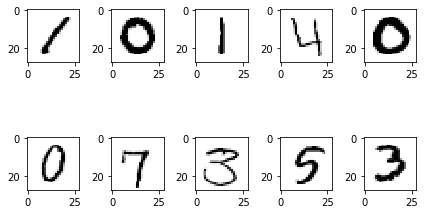

In [8]:
# 이미지 확인
figure = plt.figure()
ax_arr = []  # python list

img_data = df.drop('label', axis=1, inplace=False).values

for n in range(10):
    ax_arr.append(figure.add_subplot(2,5,n+1))
    ax_arr[n].imshow(img_data[n].reshape(28,28), 
                     cmap='Greys',            # 흑백이미지 표현
                     interpolation='nearest') # 보간법

plt.tight_layout()
plt.show()

In [9]:
# Data Split
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=1,
                 stratify=df['label'])
# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)


In [10]:
## Tensorflow Implementation ##
sess = tf.Session()

onehot_train_t_data = sess.run(tf.one_hot(train_t_data, depth=10))
onehot_test_t_data = sess.run(tf.one_hot(test_t_data, depth=10))

# placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
T = tf.placeholder(shape=[None,10], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random.normal([784,10]))
b = tf.Variable(tf.random.normal([10]))

# Hypothesis, Model
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

# Loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                 labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(loss)

# session, 초기화
sess.run(tf.global_variables_initializer())

# 반복학습
num_of_epoch = 1000
batch_size = 100

for step in range(num_of_epoch):
    
    total_batch = int(norm_train_x_data.shape[0] / batch_size)

    for i in range(total_batch):
        batch_x = norm_train_x_data[i*batch_size:(i+1)*batch_size]
        batch_y = onehot_train_t_data[i*batch_size:(i+1)*batch_size]
        
        _, loss_val = sess.run([train, loss], feed_dict={X:batch_x,
                                                         T:batch_y})
    if step % 100 == 0:
        print('loss val : {}'.format(loss_val))

loss val : 1.5739980936050415
loss val : 0.21712468564510345
loss val : 0.20056335628032684
loss val : 0.19421109557151794
loss val : 0.19195732474327087
loss val : 0.1906794160604477
loss val : 0.18958503007888794
loss val : 0.18855281174182892
loss val : 0.18759359419345856
loss val : 0.18672561645507812


In [11]:
# accuracy 측정
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(T,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

accuracy_val = sess.run(accuracy, feed_dict={X:norm_test_x_data,
                                             T:onehot_test_t_data})
print('Accuracy : {}'.format(accuracy_val))  # 0.9073809385299683

Accuracy : 0.9073809385299683


In [2]:
import tensorflow as tf
print(tf.__version__)  # 2.3.0

W = tf.random.normal([1], dtype=tf.float32)

# 1.15버전에서 W의 값을 알아내려면 session을 통해서 node를 실행시켜서
# 값을 얻어야 함
# 2.x 버전은 eager execution(즉시실행모드)를 지원함
# session이 필요없고 일반적인 프로그래밍 하는 것처럼 사용가능

print(W.numpy())  # [1.838462]

# 추가적으로 초기화 하는 코드 역시 불필요
# sess.run(tf.global_varialbes_initializer())  # 사용X

# placeholder도 삭제됨


2.3.0
[1.838462]


In [3]:
# keras이용

# keras의 model은 어떻게 만드나요?
import tensorflow as tf

model = tf.keras.models.Sequential()

# model.add()를 이용해서 layer 추가
# model.add('input layer')
# model.add('output layer')

# loss 종류와 optimizer종류를 설정
# model.compile()

# 학습 (마치 sklearn 이용하는 것처럼)
# model.fit()

# 평가와 predict
# model.evaluate()  =>  모델평가
# model.predict()   =>  예측값 도출

# 모델 저장
# model.save()

In [22]:
%reset
# 대표적인 multinomial 예제인 MNIST를 이용해서
# tensorflow 2.x 버전으로 구현해보자

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential  # kears model  # 레이어를 층층히 쌓아가는 연쇄 모델
from tensorflow.keras.layers import Flatten, Dense  # Flatten(Input Layer)
                                                     # Dense(Output Layer)  # 완전연결층
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# raw data loading
df = pd.read_csv('./data/mnist/train.csv')
display(df)

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# 데이터 전처리

# Data Split
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=1,
                 stratify=df['label'])
# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

In [24]:
# tensorflow 2.x구현

# model 생성
model = Sequential()

# layer 추가
# input layer
model.add(Flatten(input_shape=(norm_train_x_data.shape[1],)))
# input shape은 독립변수 갯수

# output layer
model.add(Dense(units=10,
                activation='softmax'))  # units의 값은 class 값의 갯수

# input layer는 사실 하는 일이 없음! 그래서 코드를 나눠쓰지 않고 한번에 쓸 수 있음 (나중에)
print(model.summary())


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
# model compile
# 사용할 loss함수를 지정, 사용한 optimizer(알고리즘)를 지정
from tensorflow.keras.optimizers import SGD, Adam

# loss
# linear : linear regression의 loss (MSE)
# binary classfication : binary_crossentropy
# multinomial classification : categorical_crossentropy (onehot encoding처리를 해야함)
# multinomial classification : sparse_categorical_crossentropy (one-hot 처리 필요X)

model.compile(optimizer=SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습결과를 변수에 저장
history = model.fit(norm_train_x_data,
                    train_t_data,
                    epochs=100,
                    batch_size=100,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/100
236/236 [==============================] - 0s 1ms/step - loss: 2.2571 - accuracy: 0.2072 - val_loss: 2.1224 - val_accuracy: 0.3168
Epoch 2/100
236/236 [==============================] - 0s 864us/step - loss: 2.0299 - accuracy: 0.3848 - val_loss: 1.9209 - val_accuracy: 0.4679
Epoch 3/100
236/236 [==============================] - 0s 853us/step - loss: 1.8463 - accuracy: 0.5214 - val_loss: 1.7545 - val_accuracy: 0.5811
Epoch 4/100
236/236 [==============================] - 0s 818us/step - loss: 1.6935 - accuracy: 0.6080 - val_loss: 1.6153 - val_accuracy: 0.6534
Epoch 5/100
236/236 [==============================] - 0s 786us/step - loss: 1.5653 - accuracy: 0.6613 - val_loss: 1.4982 - val_accuracy: 0.6940
Epoch 6/100
236/236 [==============================] - 0s 842us/step - loss: 1.4571 - accuracy: 0.6940 - val_loss: 1.3990 - val_accuracy: 0.7207
Epoch 7/100
236/236 [==============================] - 0s 824us/step - loss: 1.3653 - accuracy: 0.7170 - val_loss: 1.3147 - val_accu

Epoch 57/100
236/236 [==============================] - 0s 776us/step - loss: 0.5504 - accuracy: 0.8672 - val_loss: 0.5472 - val_accuracy: 0.8673
Epoch 58/100
236/236 [==============================] - 0s 785us/step - loss: 0.5471 - accuracy: 0.8676 - val_loss: 0.5441 - val_accuracy: 0.8677
Epoch 59/100
236/236 [==============================] - 0s 786us/step - loss: 0.5440 - accuracy: 0.8679 - val_loss: 0.5411 - val_accuracy: 0.8679
Epoch 60/100
236/236 [==============================] - 0s 773us/step - loss: 0.5409 - accuracy: 0.8685 - val_loss: 0.5382 - val_accuracy: 0.8682
Epoch 61/100
236/236 [==============================] - 0s 821us/step - loss: 0.5379 - accuracy: 0.8689 - val_loss: 0.5353 - val_accuracy: 0.8685
Epoch 62/100
236/236 [==============================] - 0s 753us/step - loss: 0.5350 - accuracy: 0.8698 - val_loss: 0.5326 - val_accuracy: 0.8694
Epoch 63/100
236/236 [==============================] - 0s 753us/step - loss: 0.5322 - accuracy: 0.8702 - val_loss: 0.5299 -

In [26]:
print(model.evaluate(norm_test_x_data, test_t_data))
#    loss                  accuracy
[0.47583842277526855, 0.8765873312950134]

394/394 [==============================] - 0s 373us/step - loss: 0.4780 - accuracy: 0.8764
[0.4780237078666687, 0.8764285445213318]


[0.47583842277526855, 0.8765873312950134]

In [27]:
# 이렇게 만든 모델을 저장해보자
# 학습 한 수 모델이 메모리에 저장되어 있음. 프로그램 종료하면 다 날라감!
# 내일 다시 하려면 처음부터 다시 학습해야함! => 시간이 오래걸림

# 모델학습에 시간이 너무 오래걸리는 경우
# 중간에 미리 저장해 놓으면 거기서부터 재 학습 가능

# 다른 사람과 모델 공유 가능

# 저장할 때 2가지 방법이 있음
# 모델을 저장할 때 모델 구조와 계산된 W,b를 같이 저장가능
# 장점: 편함 , 단점: 사이즈가 큼

# 모델을 저장할 때 모델 구조는 저장하지 않고 W,b만 저장
# 장점: 크기가 작음, 단점: 사용하려면 모델을 먼저 만들고 W,b를 로딩

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential  # keras model
from tensorflow.keras.layers import Flatten, Dense  # Flatten(Input Layer)
                                                    # Dense(Output Layer)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

# Raw Data Loading
df = pd.read_csv('./data/mnist/train.csv')

# Data Split
# 기존에는 test_x_data, test_t_data 이 두 데이터를 validation 용도로 
# 사용했어요!
# 이제는 test_x_data, test_t_data 이 두 데이터를 test 용도로 사용할꺼예요!
# 최종 모델 성능평가를 위해서 딱 1번만 사용할꺼예요!
# 그러면 validation은 어떻게 하나요?
# keras는 학습할 때 train data를 일정부분 나누어서 자체 validation이 가능
# keras 기능을 이용해서 validation 처리

train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=1,
                 stratify=df['label'])

# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

# 우리는 loss 지정할 때 sparse_categorical_crossentropy로 loss함수를
# 지정할 예정이기 때문에 label에 대한 one-hot encoding처리가 필요 없어요!

# model 생성
model = Sequential()

# layer 추가
# input layer
model.add(Flatten(input_shape=(norm_train_x_data.shape[1],)))

# output layer
model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer=SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model의 저장할려고 해요. model 구조 빼고 checkpoint기능을 이용해서 
# weight, b만 저장
# 어디에 저장할지를 알려줘야 해요!
checkpoint_path = './training_ckpt/cp.ckpt'
# checkpoint_dir = os.path.dirname(checkpoint_path)  # 실제 경로로 만들어요!
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1)


# 학습결과를 변수에 저장
history = model.fit(norm_train_x_data,
                    train_t_data,
                    epochs=100,
                    batch_size=100,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[cp_callback])

# 우리 모델에 대한 최종 평가진행
print(model.evaluate(norm_test_x_data, test_t_data))
#        loss               accuracy
# [0.4799305200576782, 0.876031756401062]

Epoch 1/100
236/236 [==============================] - ETA: 0s - loss: 2.3394 - accuracy: 0.1449
Epoch 00001: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 2ms/step - loss: 2.3394 - accuracy: 0.1449 - val_loss: 2.2087 - val_accuracy: 0.2248
Epoch 2/100
195/236 [=======================>......] - ETA: 0s - loss: 2.1160 - accuracy: 0.2857
Epoch 00002: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 1ms/step - loss: 2.0958 - accuracy: 0.3018 - val_loss: 1.9944 - val_accuracy: 0.3769
Epoch 3/100
218/236 [==========================>...] - ETA: 0s - loss: 1.9070 - accuracy: 0.4544
Epoch 00003: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 924us/step - loss: 1.9008 - accuracy: 0.4594 - val_loss: 1.8165 - val_accuracy: 0.5262
Epoch 4/100
207/236 [=========================>....] - ETA: 0s - loss: 1.7466 - accuracy: 0.5826
Epoch 00004: saving model to ./training_ckpt\cp.ckpt
236/2

220/236 [==========================>...] - ETA: 0s - loss: 0.5448 - accuracy: 0.8690
Epoch 00059: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 1ms/step - loss: 0.5457 - accuracy: 0.8680 - val_loss: 0.5470 - val_accuracy: 0.8656
Epoch 60/100
230/236 [============================>.] - ETA: 0s - loss: 0.5421 - accuracy: 0.8690
Epoch 00060: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 1ms/step - loss: 0.5426 - accuracy: 0.8685 - val_loss: 0.5441 - val_accuracy: 0.8655
Epoch 61/100
221/236 [===========================>..] - ETA: 0s - loss: 0.5393 - accuracy: 0.8691
Epoch 00061: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.8688 - val_loss: 0.5412 - val_accuracy: 0.8658
Epoch 62/100
189/236 [=======================>......] - ETA: 0s - loss: 0.5381 - accuracy: 0.8685
Epoch 00062: saving model to ./training_ckpt\cp.ckpt
236/236 [=======

In [30]:
# 아하 이렇게 저장 가능
# 불러서 다시 사용하려면 어떻게 해야하나요?

# 일단 학습하지 않은 상태로 evaluation을 진행하면 당연히 평가결과가
# 좋지않음. 이거 확인하고
# 그 다음에 checkpoint 파일을 로드해서 model을 재설정하고 평가를 진행
# 좋게 나오겠네요!

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential  # keras model
from tensorflow.keras.layers import Flatten, Dense  # Flatten(Input Layer)
                                                    # Dense(Output Layer)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

# Raw Data Loading
df = pd.read_csv('./data/mnist/train.csv')

# Data Split
# 기존에는 test_x_data, test_t_data 이 두 데이터를 validation 용도로 
# 사용했어요!
# 이제는 test_x_data, test_t_data 이 두 데이터를 test 용도로 사용할꺼예요!
# 최종 모델 성능평가를 위해서 딱 1번만 사용할꺼예요!
# 그러면 validation은 어떻게 하나요?
# keras는 학습할 때 train data를 일정부분 나누어서 자체 validation이 가능
# keras 기능을 이용해서 validation 처리

train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=1,
                 stratify=df['label'])

# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

# 우리는 loss 지정할 때 sparse_categorical_crossentropy로 loss함수를
# 지정할 예정이기 때문에 label에 대한 one-hot encoding처리가 필요 없어요!

# model 생성
model = Sequential()

# layer 추가
# input layer
model.add(Flatten(input_shape=(norm_train_x_data.shape[1],)))

# output layer
model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer=SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 원래는 학습을 진행행해야 해요! 그런데 학습을 안할꺼예요!

# 학습을 진행하지 않고 최종 평가진행
print(model.evaluate(norm_test_x_data, test_t_data))
#        loss               accuracy
# [2.4244349002838135, 0.08492063730955124]
# 당연히 학습이 안된 모델이기 때문에 이렇게 나오는게 정상

394/394 [==============================] - 0s 658us/step - loss: 2.4018 - accuracy: 0.1164
[2.401752233505249, 0.11642856895923615]


In [31]:
# 이번에는 checkpoint 파일에 있는 weight를 load한 후
# evaluation 시켜보아요!

checkpoint_path = './training_ckpt/cp.ckpt'
model.load_weights(checkpoint_path)
print(model.evaluate(norm_test_x_data, test_t_data))
# [0.48125016689300537, 0.8734920620918274]

394/394 [==============================] - 0s 572us/step - loss: 0.4789 - accuracy: 0.8760
[0.47885289788246155, 0.8759523630142212]
